In [17]:
# importing necessary packages

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics 
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
import seaborn as sns

%matplotlib inline

### 1a. K-Nearest Neighbors

In [18]:
# importing CSV

url = 'https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/HW2.csv'
df = pd.read_csv(url)

df.head()

,age,had_cancer,gender_id,income_in_k,state,credit_score,num_credit_sources,utilization_rate,gave_loan
0,39,0,Female,54,TX,448,4,0.32,0
1,43,0,Female,66,NJ,399,4,0.35,0
2,42,0,Male,50,NE,509,8,0.23,0
3,46,0,Female,79,TX,540,6,0.15,0
4,43,0,Female,49,NV,485,10,0.20,0


In [19]:
# checking for missing data
df.isnull().sum()

age                   0
had_cancer            0
gender_id             0
income_in_k           0
state                 0
credit_score          0
num_credit_sources    0
utilization_rate      0
gave_loan             0
dtype: int64

In [20]:
# using get_dummies() to convert gender into dummy variables
dummies = pd.get_dummies(df['gender_id'])

# concating new columns to dataframe
df = pd.concat([df,dummies], axis = 1)

# removing original column from dataframe
df.drop('gender_id', inplace = True, axis = 1)
df.head()

,age,had_cancer,income_in_k,state,credit_score,num_credit_sources,utilization_rate,gave_loan,Female,Male,Non-Binary,Survey Choices Do Not Accurately Reflect My Identity
0,39,0,54,TX,448,4,0.32,0,1,0,0,0
1,43,0,66,NJ,399,4,0.35,0,1,0,0,0
2,42,0,50,NE,509,8,0.23,0,0,1,0,0
3,46,0,79,TX,540,6,0.15,0,1,0,0,0
4,43,0,49,NV,485,10,0.20,0,1,0,0,0


Accuracy for our training dataset with tuning is : 73.78%
The best k value was found to be:  28


Text(0.5, 1.0, 'Confusion Matrix')

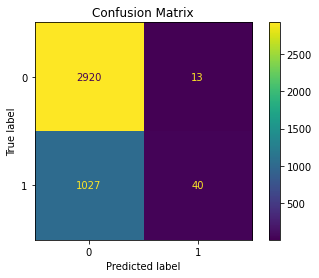

In [21]:
# KNN model

# all predictors
predictors = ['age', 'had_cancer', 'income_in_k', 'state', 'credit_score', 'num_credit_sources', 
'utilization_rate', 'Female', 'Male', 'Non-Binary', 'Survey Choices Do Not Accurately Reflect My Identity']

# predictors with only continuous/interval columns
contin = ['age', 'credit_score', 'income_in_k', 'num_credit_sources', 'utilization_rate']

X = df[predictors]
y = df['gave_loan']

# split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# create model
knn = KNeighborsClassifier()

# create z score object
z = make_column_transformer((StandardScaler(), contin))

# make pipeline
pipe = make_pipeline(z, knn)
# print(pipe.get_params().keys())

# choose potential values of k
ks = {"kneighborsclassifier__n_neighbors": range(1,30)}

# use grid search to find best parameters
grid = GridSearchCV(pipe, ks, scoring = "accuracy", cv = 5, refit = True)

# fit model
knnmod = grid.fit(X_train, y_train)
grid_search = grid.fit(X_train, y_train)

# finding the accuracy of the training dataset
accuracy = grid_search.best_score_ * 100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy))

# getting the k value used for the KNN model
print('The best k value was found to be: ', knnmod.best_estimator_.get_params()['kneighborsclassifier__n_neighbors'])

# plotting the confusion matrix
plot_confusion_matrix(grid, X, y)
plt.title('Confusion Matrix')

In [22]:
df.head()

,age,had_cancer,income_in_k,state,credit_score,num_credit_sources,utilization_rate,gave_loan,Female,Male,Non-Binary,Survey Choices Do Not Accurately Reflect My Identity
0,39,0,54,TX,448,4,0.32,0,1,0,0,0
1,43,0,66,NJ,399,4,0.35,0,1,0,0,0
2,42,0,50,NE,509,8,0.23,0,0,1,0,0
3,46,0,79,TX,540,6,0.15,0,1,0,0,0
4,43,0,49,NV,485,10,0.20,0,1,0,0,0


In [25]:
# Decision Tree Model

X = df[[predictors]]
y = df['gave_loan']

# A new TTS is not made in this model because we want to use the same training set
zscore = StandardScaler()
zscore.fit(X_train[contin])

X_train[contin] = 






StandardScaler()